## Classification Assignment

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Task 1: Data Exploration
1. Dataset Selection: Choose a classification dataset from sources like UCI Machine Learning
Repository or Kaggle (e.g., Iris, Titanic, or MNIST).
2. Data Loading: Load the dataset into a Pandas DataFrame.
3. Exploratory Data Analysis:
o Display the first few rows of the dataset.
o Check for missing values and handle them appropriately.
o Visualize the distribution of classes using a bar chart.
o Analyze feature distributions using histograms.

First five rows of the dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Missing values in the dataset:


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

C:\Users\My pc\AppData\Local\Temp\ipykernel_1380\1459099066.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\My pc\AppData\Local\Temp\ipykernel_1380\1459099066.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

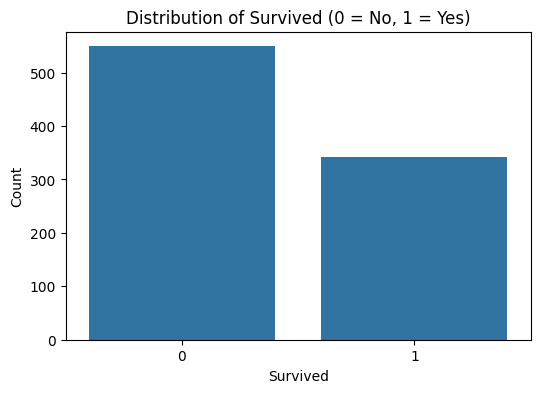

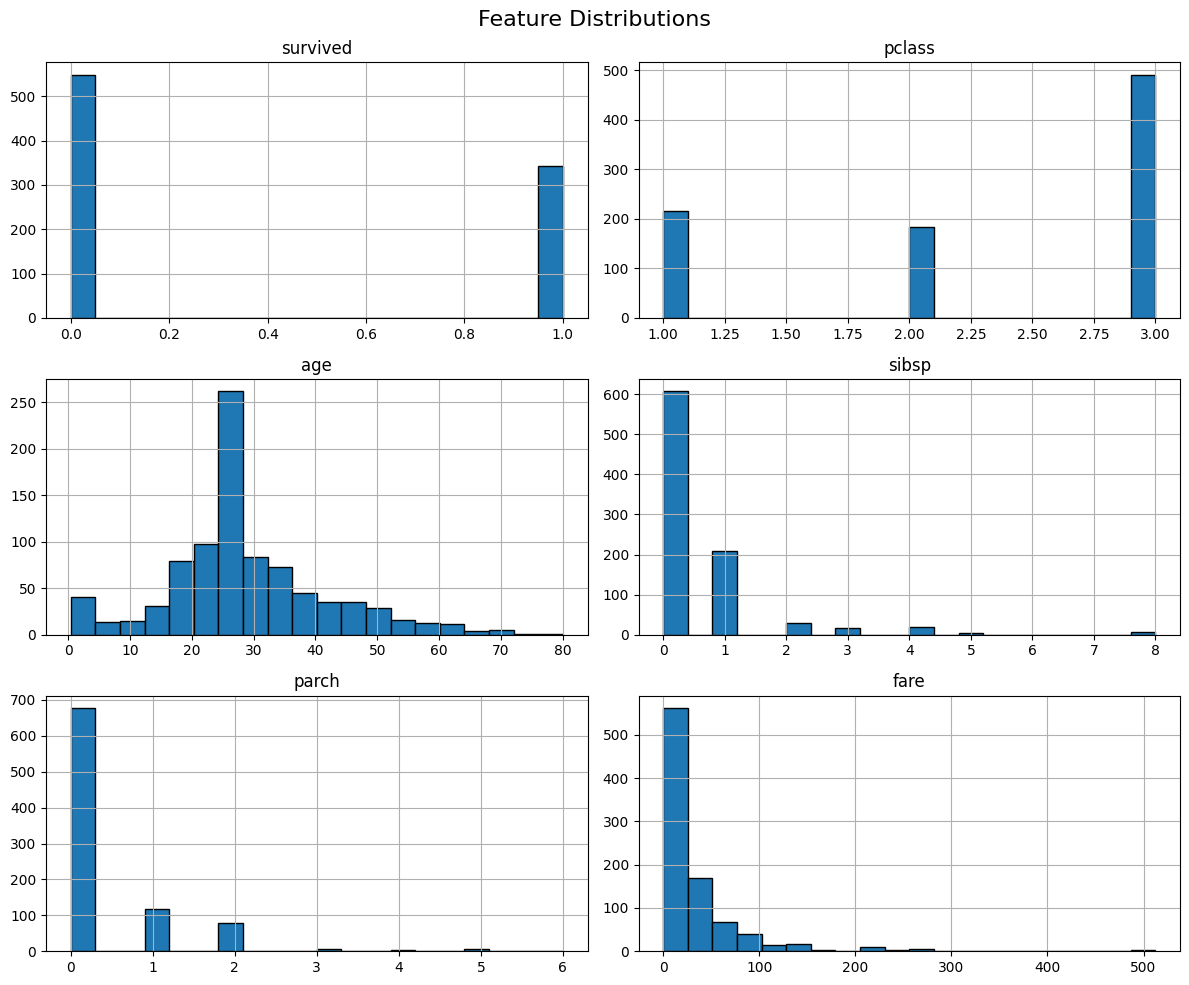

Survival count by gender:


,Not Survived,Survived
sex,,
female,81,233
male,468,109


In [26]:
# Step 2: Load the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# Step 3: Display the first few rows
print("First five rows of the dataset:")
display(df.head())
misssing_values = df.isnull().sum()
# Step 4: Check for missing values
print("\nMissing values in the dataset:")
display(misssing_values)
# Optional: Handle missing values (e.g., fill or drop)
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df.drop(columns=['deck'], inplace=True)  # Too many missing values
# Step 5: Visualize the distribution of classes (target = survived)
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df)
plt.title('Distribution of Survived (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
# Step 6: Feature distributions (histograms for numerical features)
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_features].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()
# Bar plot to visualize gender-based survival
#Count of survivors by sex
survivor_counts = df.groupby(['sex', 'survived']).size().unstack()
survivor_counts.columns = ['Not Survived', 'Survived']
print("Survival count by gender:")
display(survivor_counts)


## Task 2: Data Preprocessing
1. Feature Engineering: Identify and create new features if necessary.
2. Encoding Categorical Variables: Apply techniques like one-hot encoding to convert
categorical features into numerical format.
3. Data Normalization/Standardization: Scale the features using Min-Max scaling or
Standardization.

In [32]:
# Create 'family_size' = siblings/spouse + parents/children + 1 (the passenger themself)
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Create 'is_minor' = 1 if age < 18, else 0
df['is_minor'] = df['age'].apply(lambda x: 1 if x < 18 else 0)

# Create 'fare_per_person'
df['fare_per_person'] = df['fare'] / df['family_size']
print("First five rows of the dataset with new features:")
display(df[['family_size', 'is_minor', 'fare_per_person']].head())
# Select relevant categorical columns for encoding
categorical_cols = ['sex', 'embarked', 'class', 'who', 'alone']
# One-Hot Encode them using pandas
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Display the first few rows of the encoded DataFrame
print("First five rows of the encoded dataset:")
display(df_encoded.head())


# Features for model training (selecting a mix of original and new engineered features)
features = [
    'pclass', 'age', 'sibsp', 'parch', 'fare', 'family_size', 'is_minor', 'fare_per_person'
] + [col for col in df_encoded.columns if col.startswith(('sex_', 'embarked_', 'class_', 'who_', 'alone_'))]

# Target variable
X = df_encoded[features]
y = df_encoded['survived']

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
display(y)  # Display first 5 rows of scaled features



First five rows of the dataset with new features:


,family_size,is_minor,fare_per_person
0,2,0,3.62500
1,2,0,35.64165
2,1,0,7.92500
3,2,0,26.55000
4,1,0,8.05000


First five rows of the encoded dataset:


,survived,pclass,age,sibsp,parch,fare,adult_male,embark_town,alive,family_size,is_minor,fare_per_person,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,alone_True
0,0,3,22.0,1,0,7.2500,True,Southampton,no,2,0,3.62500,True,False,True,False,True,True,False,False
1,1,1,38.0,1,0,71.2833,False,Cherbourg,yes,2,0,35.64165,False,False,False,False,False,False,True,False
2,1,3,26.0,0,0,7.9250,False,Southampton,yes,1,0,7.92500,False,False,True,False,True,False,True,True
3,1,1,35.0,1,0,53.1000,False,Southampton,yes,2,0,26.55000,False,False,True,False,False,False,True,False
4,0,3,35.0,0,0,8.0500,True,Southampton,no,1,0,8.05000,True,False,True,False,True,True,False,True


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

## Task 3: Model Training and Evaluation
1. Train-Test Split: Split the dataset into training and testing sets (e.g., 80% training, 20%
testing).
2. Model Selection: Choose at least two classification algorithms (e.g., Logistic Regression,
Decision Trees, Random Forest, SVM).
3. Training: Train the selected models on the training data.
4. Prediction: Make predictions on the test set.

In [40]:
from sklearn.model_selection import train_test_split
# X_scaled: feature matrix (already scaled in preprocessing)
# y: target variable ('survived')
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Initialize the models
log_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)
# Fit the models on training data
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
# Predict the survival outcomes on the test set
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


## Task 4: Model Evaluation
1. Performance Metrics: Calculate accuracy, precision, recall, and F1-score for each model.
2. Confusion Matrix: Generate and visualize the confusion matrix for each model.
3. ROC Curve: If applicable, plot the ROC curve and compute the AUC score.

🔹 Logistic Regression Metrics:
Accuracy: 0.8100558659217877
Precision: 0.7941176470588235
Recall: 0.7297297297297297
F1 Score: 0.7605633802816901

🔹 Random Forest Metrics:
Accuracy: 0.8212290502793296
Precision: 0.7837837837837838
Recall: 0.7837837837837838
F1 Score: 0.7837837837837838


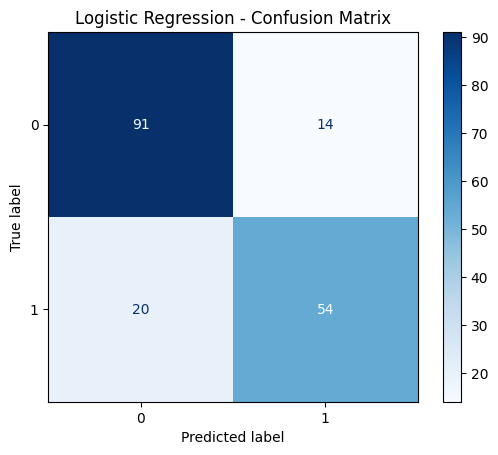

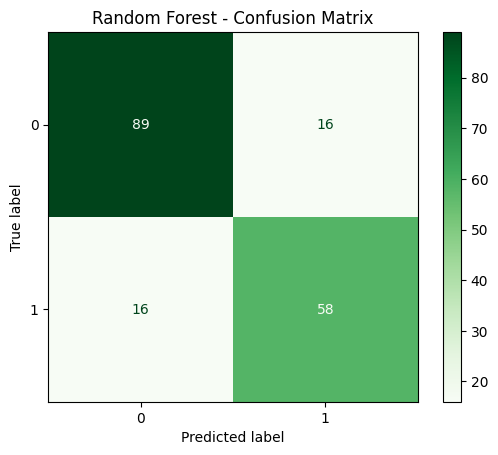

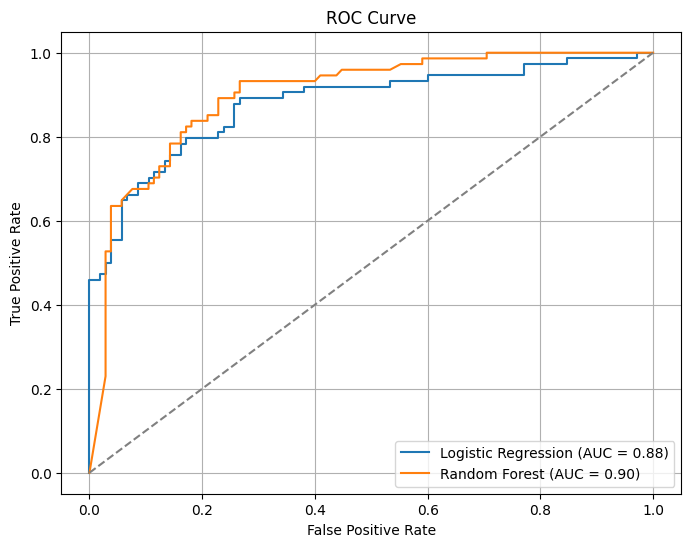

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression metrics
print("🔹 Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

# Random Forest metrics
print("\n🔹 Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# step 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_model.classes_)
disp_log.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Greens)
plt.title("Random Forest - Confusion Matrix")
plt.show()

#step 3
from sklearn.metrics import roc_curve, roc_auc_score

# Get prediction probabilities
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# AUC scores
auc_log = roc_auc_score(y_test, y_prob_log)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
